### KNJIGE


V okviru naloge smo uporabili podatke o knjigah iz spletne strani https://www.gutenberg.org/ebooks/bookshelf . Za potrebe analize smo pripravili datoteko gutenberg_books.csv, ki vsebuje osnovne informacije o posameznih knjigah, kot so naslov, avtor, leto izida, jezik, zahtevnost ter število prenosov v zadnjih 30 dneh. Skupno je v zbirko vključenih 274 knjig, ki predstavljajo izhodišče za nadaljnjo obdelavo in preučevanje.

In [103]:
#paketi za obdelavo podatkov
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

#nalozimo podatke gutenberg_books.csv
podatki = pd.read_csv("gutenberg_books.csv")

In [85]:
#prvih 10 knjig
podatki.head(10).drop(columns=["url"])

,title,author,release_date,language,reading_level,downloads_last_30d
0,The Interesting Narrative of the Life of Olaud...,Olaudah Equiano,"Mar 17, 2005",English,Plain English. Easily understood.,6431
1,"How I found Livingstone : Travels, adventures...",Henry M. Stanley,"Feb 1, 2004",English,Plain English. Easily understood.,1303
2,"The History of the Rise, Progress and Accompli...",Thomas Clarkson,"Jan 1, 2004",English,Difficult to read.,1194
3,Missionary Travels and Researches in South Africa,David Livingstone,"Feb 11, 2006",English,Difficult to read.,1185
4,"The Last Journals of David Livingstone, in Cen...",David Livingstone,"Sep 7, 2005",English,Fairly difficult to read.,958
5,"Travels in West Africa: Congo Français, Corisc...",Mary Henrietta Kingsley,"Jun 1, 2004",English,Fairly difficult to read.,877
6,The Suppression of the African Slave Trade to ...,W. E. B. Du Bois,"Feb 7, 2006",English,Fairly difficult to read.,816
7,The Story of an African Farm,Olive Schreiner,"Sep 1, 1998",English,Fairly easy to read.,802
8,Travels in the Interior of Africa — Volume 01,Mungo Park,"Mar 1, 2004",English,Difficult to read.,729
9,"The Last Journals of David Livingstone, in Cen...",David Livingstone,"Nov 8, 2005",English,Fairly difficult to read.,680


In [86]:
#zadnjih 10 knjig
podatki.tail(10).drop(columns=["url"])

,title,author,release_date,language,reading_level,downloads_last_30d
265,A Child's History of England,Charles Dickens,"Oct 1, 1996",English,Fairly difficult to read.,1448
266,The Underground Railroad,William Still,"Mar 5, 2005",English,Fairly difficult to read.,1301
267,History of the Philippine Islands,Antonio de Morga,"Dec 1, 2004",English,Difficult to read.,1297
268,The Oregon Trail: Sketches of Prairie and Rock...,Francis Parkman,"Apr 27, 2006",English,Fairly difficult to read.,1284
269,History of Holland,George Edmundson,"Feb 8, 2005",English,Difficult to read.,1198
270,The Story of the Barbary Corsairs,Stanley Lane-Poole and J. D. Jerrold Kelley,"Jul 28, 2007",English,Fairly difficult to read.,1127
271,The Loss of the S. S. Titanic: Its Story and I...,Lawrence Beesley,"Oct 1, 2004",English,Fairly difficult to read.,1126
272,A School History of the Great War,"Albert E. McKinley, Charles A. Coulomb, and Ar...","Dec 3, 2005",English,Difficult to read.,1037
273,This Country of Ours,H. E. Marshall,"Feb 1, 2003",English,Fairly easy to read.,979
274,A School History of the United States,John Bach McMaster,"Feb 1, 2004",English,Fairly difficult to read.,943


In [87]:
#Razpredelnica z naslovom knjig, avtorjem, datum izida in težavnostjo
podatki[['title','author', 'release_date', 'reading_level']]

,title,author,release_date,reading_level
0,The Interesting Narrative of the Life of Olaud...,Olaudah Equiano,"Mar 17, 2005",Plain English. Easily understood.
1,"How I found Livingstone : Travels, adventures...",Henry M. Stanley,"Feb 1, 2004",Plain English. Easily understood.
2,"The History of the Rise, Progress and Accompli...",Thomas Clarkson,"Jan 1, 2004",Difficult to read.
3,Missionary Travels and Researches in South Africa,David Livingstone,"Feb 11, 2006",Difficult to read.
4,"The Last Journals of David Livingstone, in Cen...",David Livingstone,"Sep 7, 2005",Fairly difficult to read.
...,...,...,...,...
270,The Story of the Barbary Corsairs,Stanley Lane-Poole and J. D. Jerrold Kelley,"Jul 28, 2007",Fairly difficult to read.
271,The Loss of the S. S. Titanic: Its Story and I...,Lawrence Beesley,"Oct 1, 2004",Fairly difficult to read.
272,A School History of the Great War,"Albert E. McKinley, Charles A. Coulomb, and Ar...","Dec 3, 2005",Difficult to read.
273,This Country of Ours,H. E. Marshall,"Feb 1, 2003",Fairly easy to read.


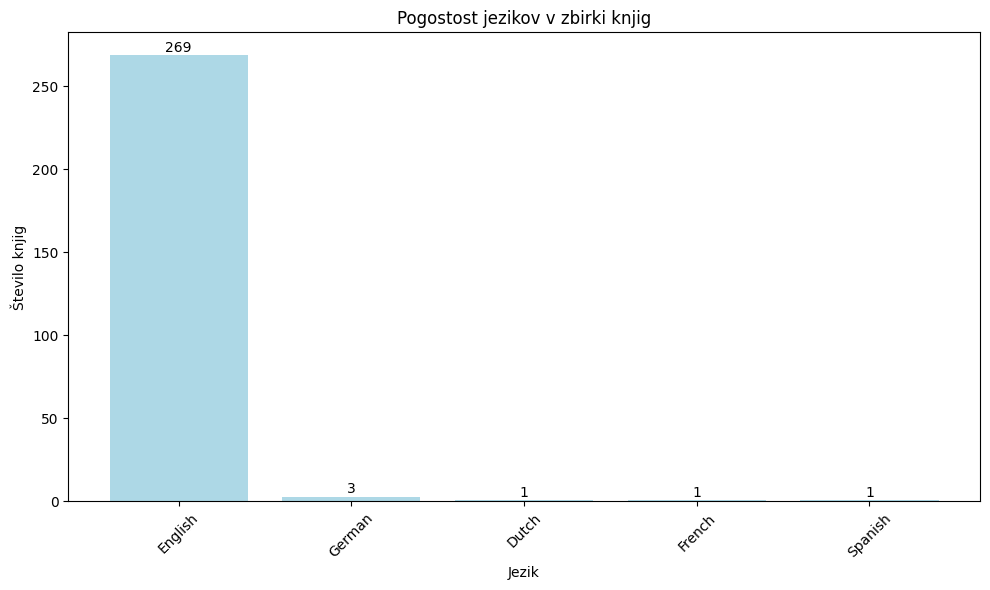

In [ ]:
#Graf1: Porazdelitev knjig glede na jezik
jeziki = podatki["language"].value_counts() 
plt.figure(figsize=(10,6)) 
bars = plt.bar(jeziki.index, jeziki.values, color='lightblue')

plt.title("Pogostost jezikov v zbirki knjig")
plt.xlabel("Jezik")
plt.ylabel("Število knjig")
plt.xticks(rotation=45)

for bar, height in zip(bars, jeziki.values):
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, str(height), ha='center', va='bottom')
plt.tight_layout()
plt.show()

Iz grafa lahko vidimo, da je večina knjig napisana v angleškem jeziku in sicer 269.

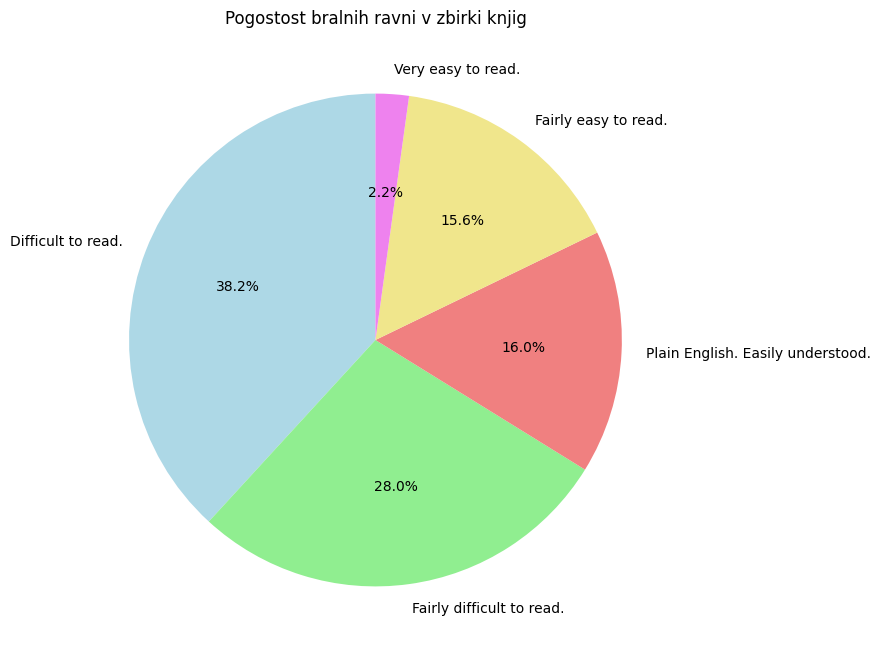

In [89]:
#Graf2: Porazdelitev knjig glede na težavnost
ravni = podatki["reading_level"].value_counts()
plt.figure(figsize=(8,8))
ravni.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=['lightblue','lightgreen','lightcoral','khaki','violet'])
plt.title("Pogostost bralnih ravni v zbirki knjig")
plt.ylabel("")  # odstrani label y
plt.show()

Iz grafa je razvidno, da je največ knjig uvrščenih v kategorijo difficult to read, medtem ko je najmanj knjig v kategoriji very easy to read. Število knjig v kategorijah plain English, easily understood in fairly easy to read pa je skoraj enako.

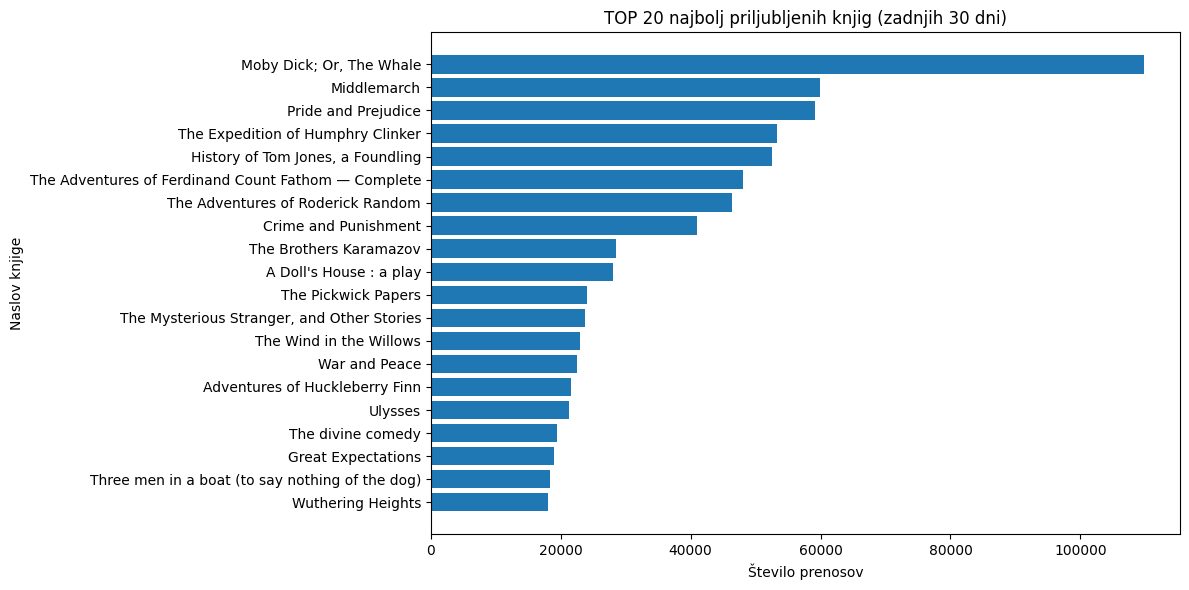

In [90]:
#Graf3: Razvrstitev knjig po številu prenosov (vzame top 20)
top_knjige = podatki.sort_values("downloads_last_30d", ascending=False).head(20)
plt.figure(figsize=(12,6))
plt.barh(top_knjige["title"], top_knjige["downloads_last_30d"])
plt.title("TOP 20 najbolj priljubljenih knjig (zadnjih 30 dni)")
plt.xlabel("Število prenosov")
plt.ylabel("Naslov knjige")
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

Najbolj priljubljena knjiga po prenosih v zadnjih 30 dneh je Moby Dick; Or, The Whale

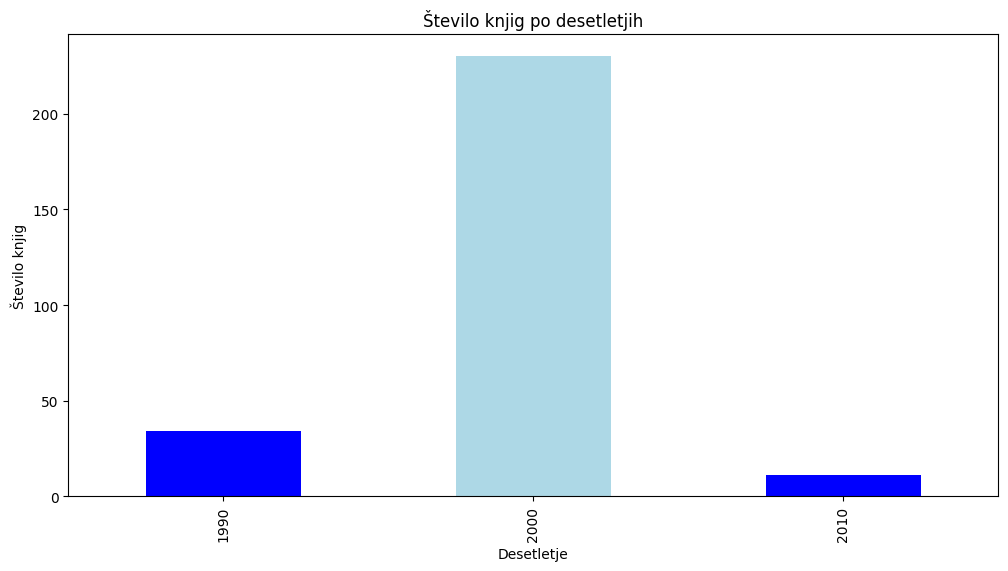

In [ ]:
#Graf4: Porazdelitev knjig glede na desetletje izida
podatki['release_date'] = pd.to_datetime(podatki['release_date'], errors='coerce')
podatki = podatki.dropna(subset=['release_date'])

podatki['decade'] = (podatki['release_date'].dt.year // 10) * 10
desetletja = podatki['decade'].value_counts().sort_index()
colors = ['lightblue' if x == desetletja.max() else 'blue' for x in desetletja.values]
plt.figure(figsize=(12,6))
desetletja.plot(kind='bar', color=colors)
plt.title("Število knjig po desetletjih")
plt.xlabel("Desetletje")
plt.ylabel("Število knjig")
plt.show()

Podatki kažejo, da je največ knjig bilo izdano leta 2000, medtem ko je leta 2010 število izdanih knjig najnižje. Leta 1990 je bilo več izdanih knjig, a še vedno manj kot leta 2000.

In [ ]:
#Razpredelnica knjig izdane pred letom 2000
podatki['release_date'] = pd.to_datetime(podatki['release_date'], format='%b %d, %Y', errors='coerce')
podatki = podatki.dropna(subset=['release_date'])
stare_knjige = podatki[podatki['release_date'].dt.year < 2000]
stare_knjige = stare_knjige[['title', 'author', 'reading_level', 'language', 'release_date']]
display(stare_knjige)

,title,author,reading_level,language,release_date
7,The Story of an African Farm,Olive Schreiner,Fairly easy to read.,English,1998-09-01
17,Native Life in South Africa,Sol. T. Plaatje,Difficult to read.,English,1998-09-01
22,The Souls of Black Folk,W. E. B. Du Bois,Plain English. Easily understood.,English,1996-01-01
24,"Poems on various subjects, religious and moral",Phillis Wheatley,Plain English. Easily understood.,English,1996-01-01
41,What is Property? An Inquiry into the Principl...,P.-J. Proudhon,Difficult to read.,English,1995-11-01
47,"System of Economical Contradictions; Or, The P...",P.-J. Proudhon,Difficult to read.,English,1996-02-01
69,History of the Conquest of Peru,William Hickling Prescott,Difficult to read.,English,1998-05-01
145,Middlemarch,George Eliot,Difficult to read.,English,1994-07-01
146,Pride and Prejudice,Jane Austen,Difficult to read.,English,1998-06-01
154,The Pickwick Papers,Charles Dickens,Fairly difficult to read.,English,1996-07-01


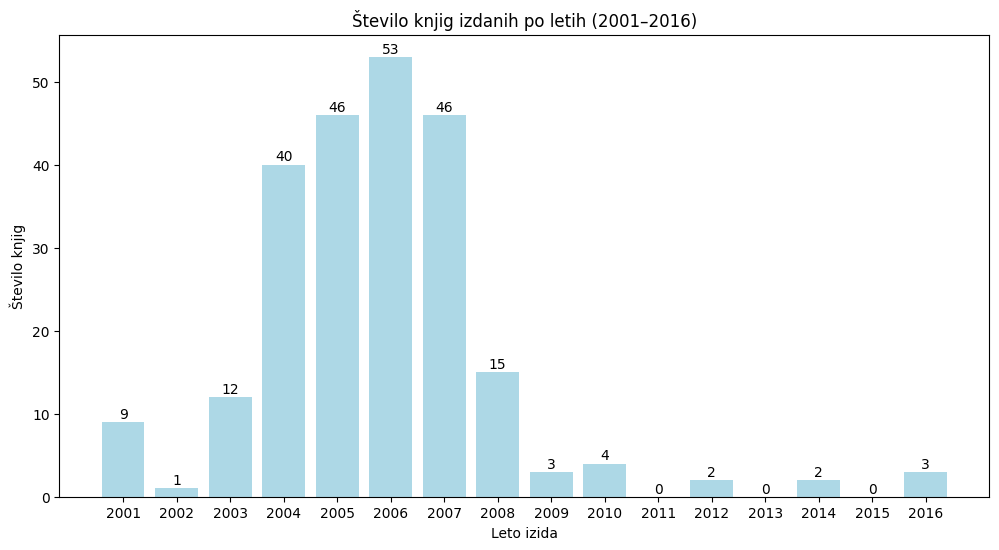

In [ ]:
#Graf5: Prikazuje število knjig izdanih po letu 2000 (gre le do leta 20016, taki podatki)
knjige_letos = novejse['release_date'].dt.year.value_counts()
vsa_leta = pd.Series(0, index=range(2001, 2017))
knjige_letos = vsa_leta.add(knjige_letos, fill_value=0)
plt.figure(figsize=(12,6))
bars = plt.bar(knjige_letos.index, knjige_letos.values, color='lightblue')
plt.title("Število knjig izdanih po letih (2001–2016)")
plt.xlabel("Leto izida")
plt.ylabel("Število knjig")
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, str(int(height)), ha='center', va='bottom')
plt.xticks(range(2001, 2017))  
plt.show()

In [ ]:
#Razpredelnica knjig izdane leta 2000
podatki['release_date'] = pd.to_datetime(podatki['release_date'], format='%b %d, %Y', errors='coerce')
podatki = podatki.dropna(subset=['release_date'])
stare_knjige = podatki[podatki['release_date'].dt.year == 2000]
stare_knjige = stare_knjige[['title', 'author', 'reading_level', 'language', 'release_date']]
display(stare_knjige)

,title,author,reading_level,language,release_date
28,Up from Slavery: An Autobiography,Booker T. Washington,Fairly difficult to read.,English,2000-10-01
38,Anarchism and Other Essays,Emma Goldman,Difficult to read.,English,2000-04-01
139,Seven Discourses on Art,Sir Joshua Reynolds,Difficult to read.,English,2000-05-01
147,The Expedition of Humphry Clinker,T. Smollett,Difficult to read.,English,2000-04-01
206,Eminent Victorians,Lytton Strachey,Fairly difficult to read.,English,2000-12-01


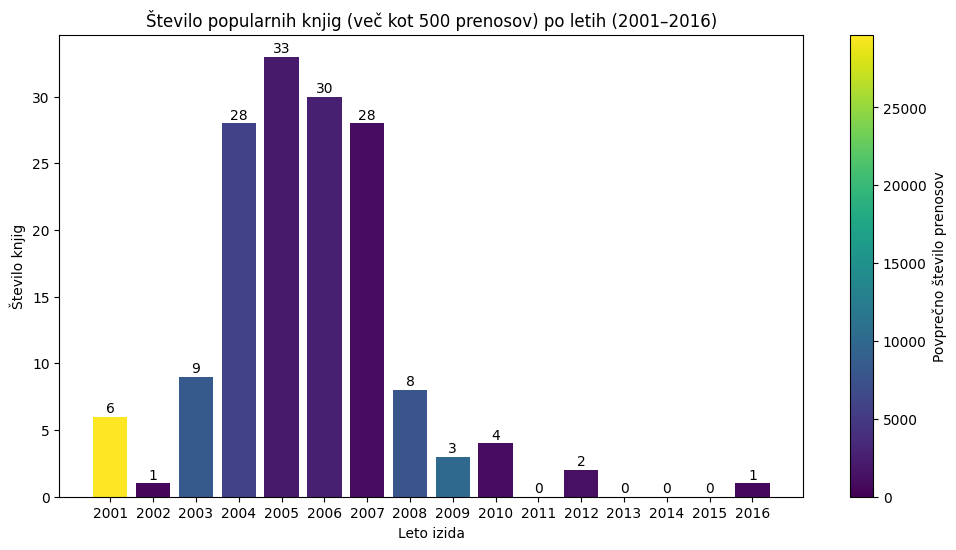

In [ ]:
#Graf6: Prikazuje knjige izdane po letu 2000 in vec kot 500-krat prenešena v zadnjih 30.dneh
knjige_letos = popularne_novejse.groupby(popularne_novejse['release_date'].dt.year).agg(
    num_books=('title', 'count'),
    avg_downloads=('downloads_last_30d', 'mean')
).reindex(range(2001, 2017), fill_value=0)
norm = colors.Normalize(vmin=knjige_letos['avg_downloads'].min(), vmax=knjige_letos['avg_downloads'].max())
cmap = cm.viridis
fig, ax = plt.subplots(figsize=(12,6))
bars = ax.bar(knjige_letos.index, knjige_letos['num_books'], color=cmap(norm(knjige_letos['avg_downloads'])))

for bar, height in zip(bars, knjige_letos['num_books']):
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.1, str(height), ha='center', va='bottom')

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # potrebno
fig.colorbar(sm, ax=ax, label='Povprečno število prenosov')

ax.set_xticks(range(2001, 2017))
ax.set_title("Število popularnih knjig (več kot 500 prenosov) po letih (2001–2016)")
ax.set_xlabel("Leto izida")
ax.set_ylabel("Število knjig")

plt.show()

In [ ]:
# knjiga z največ prenosi
najvec_prenosov = podatki.loc[podatki['downloads_last_30d'].idxmax()]
print("Knjiga z največ prenosi:")
print(najvec_prenosov[['title','author','downloads_last_30d']])

# knjiga z najmanj prenosi
najmanj_prenosov = podatki.loc[podatki['downloads_last_30d'].idxmin()]
print("\nKnjiga z najmanj prenosi:")
print(najmanj_prenosov[['title','author','downloads_last_30d']])

Knjiga z največ prenosi:
title                 Moby Dick; Or, The Whale
author                         Herman Melville
downloads_last_30d                      109836
Name: 144, dtype: object

Knjiga z najmanj prenosi:
title                 The Problem of the Ohio Mounds
author                                  Cyrus Thomas
downloads_last_30d                               117
Name: 99, dtype: object


Največ prenosov ima knjiga Moby Dick; Or, The Whale pisatelja Herman Melville in sicer 109836, najmanj pa knjiga z naslovom The Problem of the Ohio Mounds pisatelja Cyrus Thomas, prenosov je bilo 117.

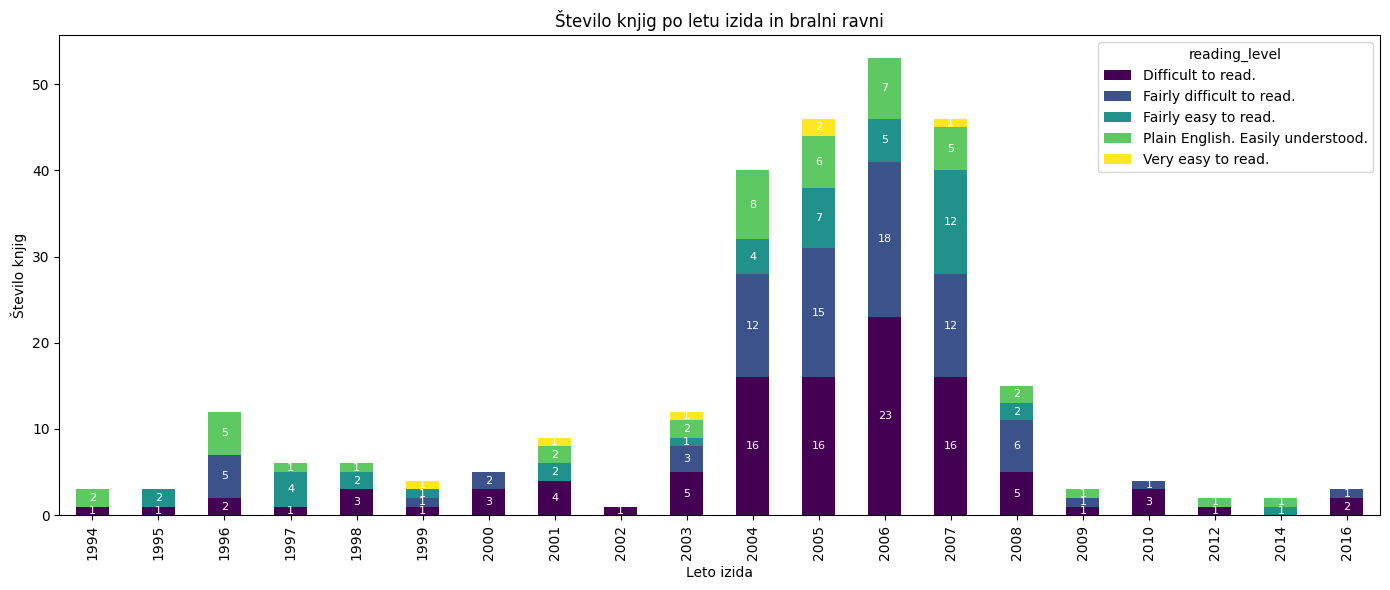

In [ ]:
#Graf7: Število knjig po letu izida in bralni ravni
podatki['year'] = podatki['release_date'].dt.year
cross = pd.crosstab(podatki['year'], podatki['reading_level'])

ax = cross.plot(kind='bar', stacked=True, figsize=(14,6), colormap='viridis')
plt.title("Število knjig po letu izida in bralni ravni")
plt.xlabel("Leto izida")
plt.ylabel("Število knjig")

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    if height > 0: 
        ax.text(x + width/2, y + height/2, int(height), ha='center', va='center', color='white', fontsize=8)
plt.tight_layout()
plt.show()

Graf prikazuje število knjig po letu izida, razdeljeno po bralni ravni. Vidimo, da je največ izidov bilo med leti 2004 in 2007, pri čemer prevladujejo zahtevnejša besedila (“Difficult to read” in “Fairly difficult to read”). V drugih letih je število izidov precej nižje, pogosto le nekaj knjig na leto. Poleg tega lahko opazimo, da je število lažje razumljivih knjig (“Plain English” in “Very easy to read”) manjše v primerjavi z zahtevnejšimi, kar kaže na večjo produkcijo zahtevnejše literature v prikazanem obdobju. Leta, kot sta 2006 in 2005, izstopajo z največjim številom knjig, medtem ko so zgodnja in kasnejša leta precej skromna glede izidov.